<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Sl. No.                                                  40 non-null     object 
 1   States/ NES/ UTs                                         40 non-null     object 
 2   Name of the State/UT                                     40 non-null     object 
 3   Project Proposal Consider                                36 non-null     float64
 4   Financial Progress (Rs in Crore) - Investment            39 non-null     float64
 5   Financial Progress (Rs in Crore) - Central Assistance    39 non-null     float64
 6   Financial Progress (Rs in Crore) - Central Assistance.1  38 non-null     float64
 7   Physical Progress (Nos) - Houses involved                39 non-null     float64
 8   Physical Progress (Nos) - Houses

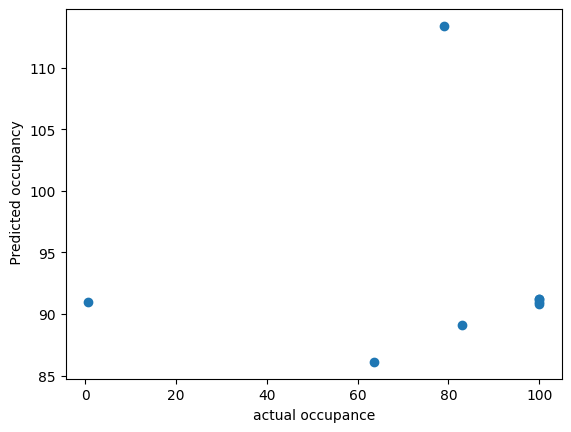

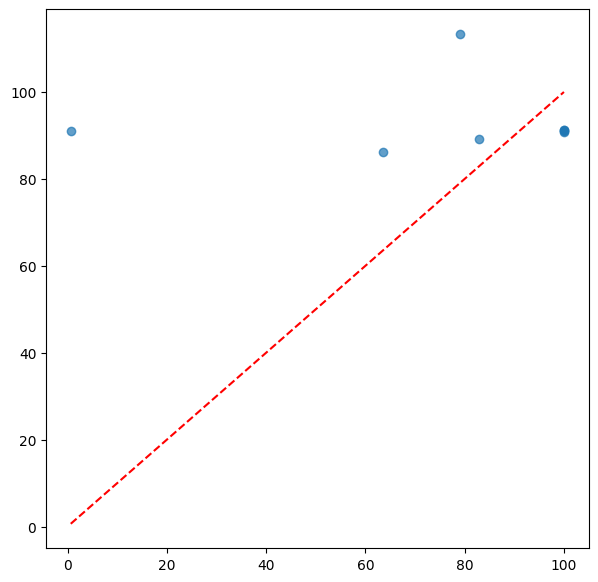

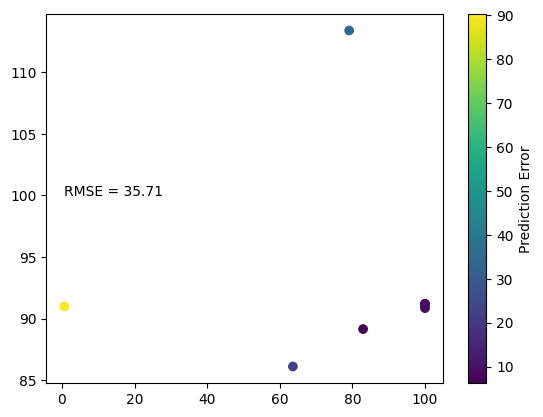

In [33]:
import pandas as pd
df= pd.read_csv("rs_session243_au2751_1.10.csv")
df.head()
df.info()
df.describe()
df.columns=["sr_no",
            "region",
            "state",
            "project_considered",
            "investment",
            "central_assist1",
            "central_assist2",
            "house_involved",
            "house_grounded",
            "house_completed",
            "house_occ"
            ]
df.isna().sum()

df.fillna(0,inplace=True)

df=df[df["house_completed"]>0]

df["Occupancy_percentage"]= (df["house_occ"] / df["house_completed"]) * 100

X=df[
       [
        "project_considered",
        "investment",
        "central_assist1",
        "house_involved",
        "house_completed"
       ]
    ]

y= df["Occupancy_percentage"]
# testsize=0.2 means of whole data 20% is for testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(
      X,y,test_size=0.2,random_state=42
)
from sklearn.linear_model import LinearRegression
model= LinearRegression()# empty linear regresion model
# try to find a best line
model.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error
# to find  rmse  hence explaining errors,outliers
#points far away from line shows outliers in the data that could have been penalized

import numpy as np
mse=mean_squared_error(y_test,preds)
rmse=np.sqrt(mse)
import matplotlib.pyplot as plt

plt.scatter(y_test,preds)
plt.xlabel("actual occupance")
plt.ylabel(" Predicted occupancy")
plt.figure(figsize=(7,7))
plt.scatter(y_test,preds,alpha=0.7)
plt.plot(
    [y_test.min(),y_test.max()],
    [y_test.min(),y_test.max()],
    'r--'

    )

plt.show()


plt.text(
    y_test.min(),
    y_test.max(),
    f"RMSE = {rmse:.2f}",

)



